Dans ce projet, nous allons analyser l'évolution du Covid 19 dans le monde
Source des données: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide


Voici quelques questions qui peuvent guider votre analyse
* Quels sont les pays avec les plus grand nombres de cas ?
* Quels sont les pays avec un taux de mortalité élevé ?
* Le confinement a-t-il eu un effet sur le nombre de cas ?
* Comparer la situation par continent 

# Importer les données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install xlrd==1.2.0

In [3]:
df=pd.read_excel('datasets/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
dateRep                                                       61900 non-null datetime64[ns]
day                                                           61900 non-null int64
month                                                         61900 non-null int64
year                                                          61900 non-null int64
cases                                                         61900 non-null int64
deaths                                                        61900 non-null int64
countriesAndTerritories                                       61900 non-null object
geoId                                                         61625 non-null object
countryterritoryCode                                          61777 non-null object
popData2019                                                   61777 non-null float64
continentExp                                   

In [5]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [7]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [8]:
#changing the column names
df.columns=['date','day','month','year','cases','deaths','country',
'old_country_code','country_code','population','continent', "cum_14_days_per_100000"]

In [9]:
#Dropping the redundant column name
df.drop(['old_country_code'],axis=1,inplace=True)

In [10]:
df1=df[df.month==12]

In [11]:
df1

,date,day,month,year,cases,deaths,country,country_code,population,continent,cum_14_days_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AFG,38041757.0,Asia,7.115865


In [12]:
# Calculating the percentage of null values:
# CODE:
df.isna().sum().sum()/len(df)

0.05048465266558966

In [13]:
df.dropna(inplace=True)

# Pays avec les plus grand nombres de cas

In [14]:
df_by_country=df.groupby('country')['cases','deaths'].sum()
df_by_country

,cases,deaths
country,,
Afghanistan,49273,1971
Albania,48460,1001
Algeria,92102,2596
Andorra,7150,79
Angola,16180,369
Anguilla,7,0
Antigua_and_Barbuda,141,4
Argentina,1498063,40764
Armenia,148682,2503


In [15]:
#Adding a new column for the mortality rate which is the ratio of the
# number of deaths to cases
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']

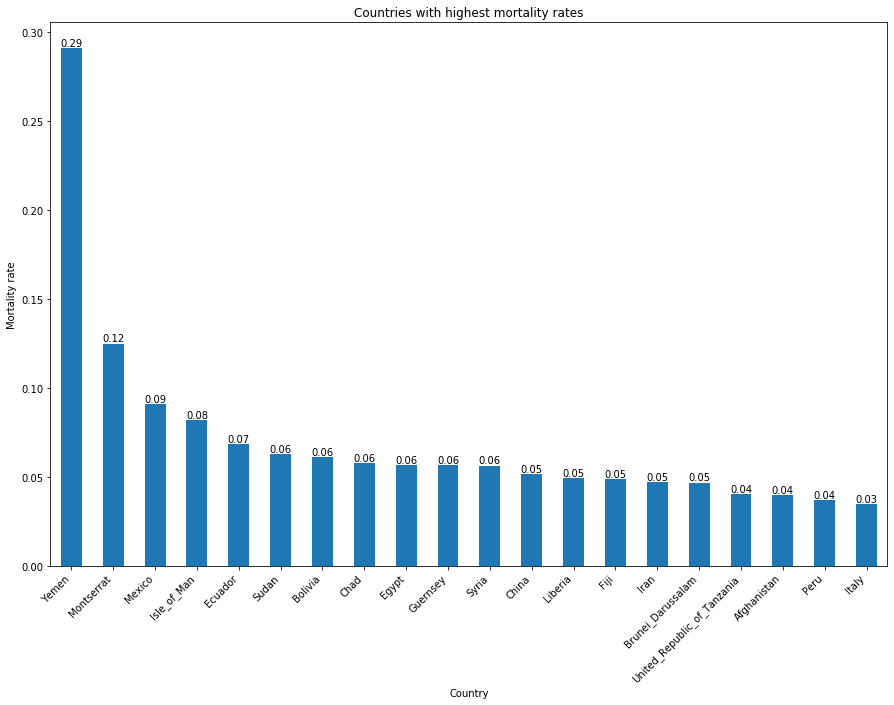

In [16]:
#Sorting the values for the mortality rate in the descending order
plt.figure(figsize=(15,10))
ax=df_by_country['mortality_rate'].sort_values(ascending=False).head(20).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(p.get_height().round(2),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')
    ax.set_xlabel("Country")
    ax.set_ylabel("Mortality rate")
    ax.set_title("Countries with highest mortality rates")

Text(0.5, 1.0, 'Top ten countries by case load')

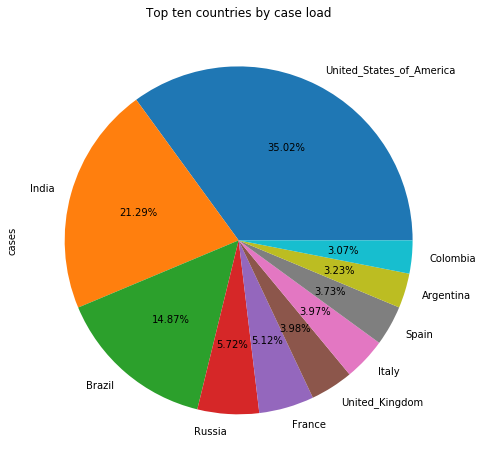

In [17]:
#Pie chart showing the countries with the highest number of COVID cases
df_cases=df_by_country['cases'].sort_values(ascending=False)
ax=df_cases.head(10).plot(kind='pie',autopct='%.2f%%',labels=df_cases.index,figsize=(12,8))
ax.set_title("Top ten countries by case load")

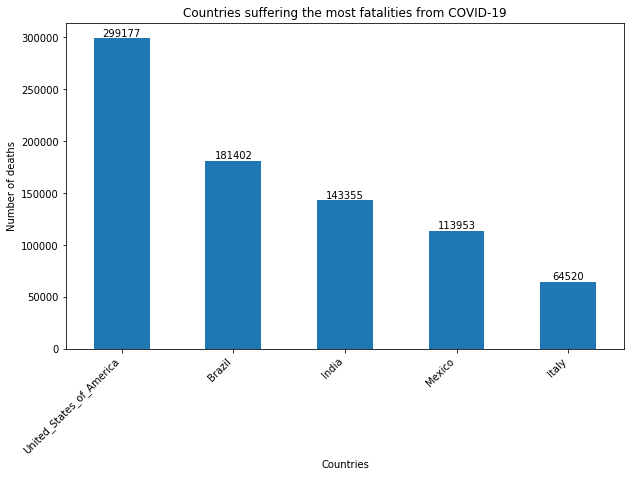

In [18]:
#sorting the number of deaths in the descending order
plt.figure(figsize=(10,6))
ax=df_by_country['deaths'].sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),
    ha='center',va='bottom')
    ax.set_title("Countries suffering the most fatalities from COVID-19")
    ax.set_xlabel("Countries")
    ax.set_ylabel("Number of deaths")

Text(0, 0.5, 'Number of deaths')

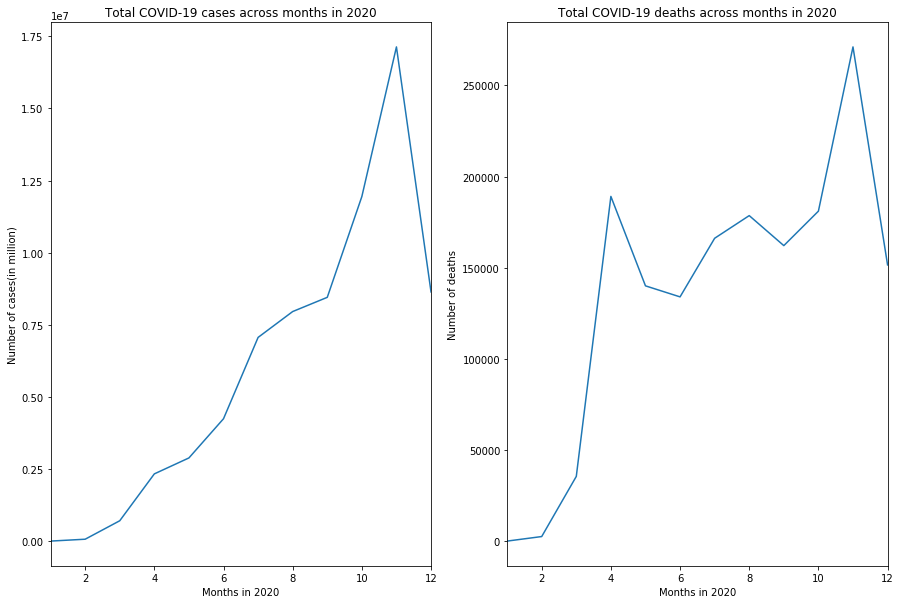

In [19]:
df_by_month=df.groupby('month')['cases','deaths'].sum()
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df_by_month['cases'].plot(kind='line',ax=ax1)
ax1.set_title("Total COVID-19 cases across months in 2020")
ax1.set_xlabel("Months in 2020")
ax1.set_ylabel("Number of cases(in million)")
df_by_month['deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Total COVID-19 deaths across months in 2020")
ax2.set_xlabel("Months in 2020")
ax2.set_ylabel("Number of deaths")

In [20]:
#Creating DataFrames for each country
#Monthwise aggregated data for Germany
df_germany=df[df.country=='Germany']
df_germany_monthwise=df_germany.groupby('month')['cases','deaths'].sum()
df_germany_grouped=df_germany_monthwise.reset_index()
#Monthwise aggregated data for UK
df_uk=df[df.country=='United_Kingdom']
df_uk_monthwise=df_uk.groupby('month')['cases','deaths'].sum()
df_uk_grouped=df_uk_monthwise.reset_index()
#Monthwise aggregated data for India
df_india=df[df.country=='India']
df_india_monthwise=df_india.groupby('month')['cases','deaths'].sum()
df_india_grouped=df_india_monthwise.reset_index()
#Monthwise aggregated data for Italy
df_italy=df[df.country=='Italy']
df_italy_monthwise=df_italy.groupby('month')['cases','deaths'].sum()
df_italy_grouped=df_italy_monthwise.reset_index()

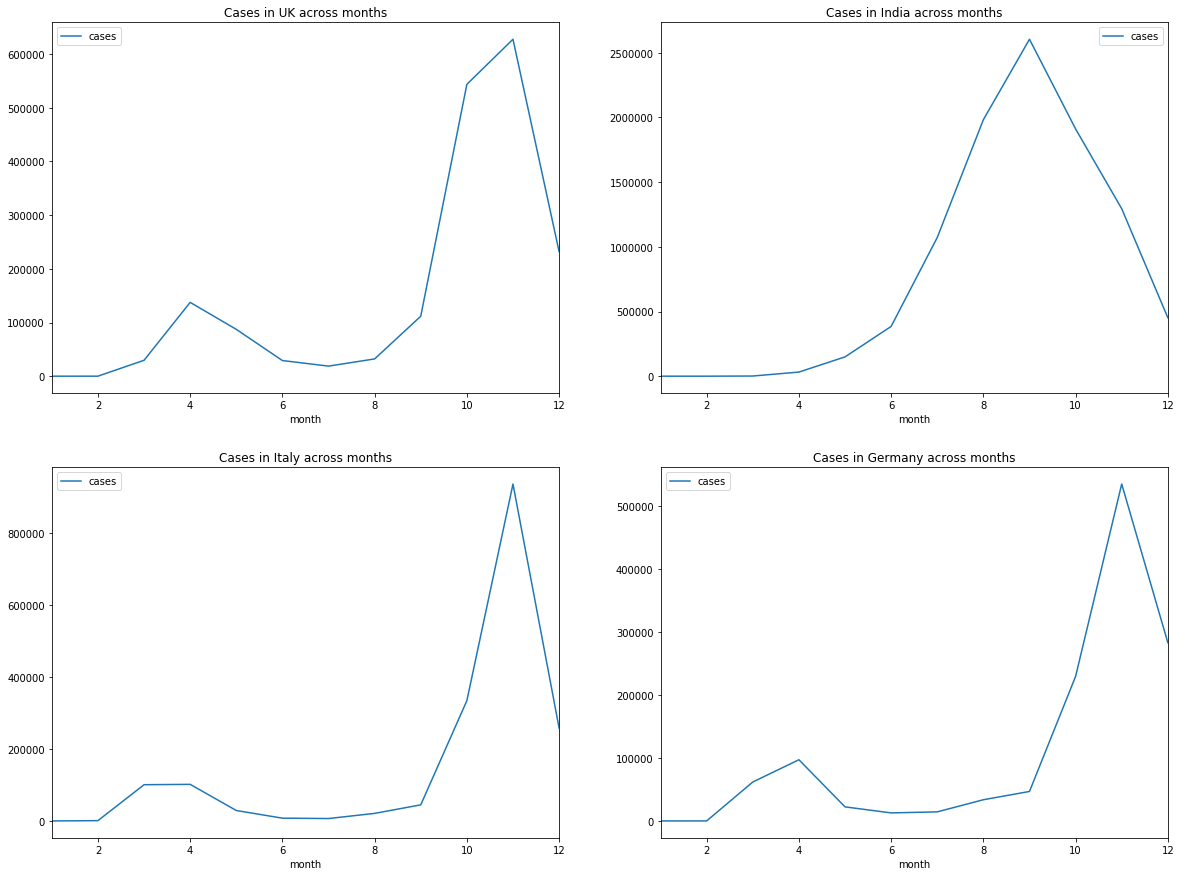

In [22]:
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(2,2,1)
df_uk_grouped.plot(kind='line',x='month',y='cases',ax=ax1)
ax1.set_title("Cases in UK across months")
ax2=fig.add_subplot(2,2,2)
df_india_grouped.plot(kind='line',x='month',y='cases',ax=ax2)
ax2.set_title("Cases in India across months")
ax3=fig.add_subplot(2,2,3)
df_italy_grouped.plot(kind='line',x='month',y='cases',ax=ax3)
ax3.set_title("Cases in Italy across months")
ax4=fig.add_subplot(2,2,4)
df_germany_grouped.plot(kind='line',x='month',y='cases',ax=ax4)
ax4.set_title("Cases in Germany across months")
plt.show()

# Situation par continent ?